### Introduction

This notebook aims to predict house prices using advanced regression techniques. It includes data preprocessing, feature engineering, and model training with various regression algorithms to identify the best model for accurate predictions.

### Steps and Methods

1. **Data Loading and Exploration**:
   - Loaded the training and test datasets.
   - Explored the data to understand its structure and identify missing values.

2. **Data Preprocessing**:
   - Handled missing values by filling them with appropriate statistics (mean, mode) or dropping columns with excessive missing data.
   - Converted categorical variables to numerical values using mapping and encoding techniques.

3. **Feature Engineering**:
   - Created new features by combining existing ones.
   - Mapped ordinal features to numerical values based on their order.

4. **Model Training and Evaluation**:
   - Split the data into training and test sets.
   - Trained multiple regression models including Linear Regression, Ridge, Lasso, ElasticNet, SGDRegressor, KNeighborsRegressor, DecisionTreeRegressor, GradientBoostingRegressor, AdaBoostRegressor, XGBRegressor, SVR, and MLPRegressor.
   - Evaluated model performance using metrics such as R-squared, RMSE, and MAE.

5. **Model Selection**:
   - Compared the performance of all models.
   - Selected the best-performing model based on evaluation metrics for final predictions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [2]:
df_test = pd.read_csv("data/test.csv")
df_train = pd.read_csv("data/train.csv")
df = pd.concat([df_train, df_test], axis=0)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [3]:
df_test.shape, df_train.shape, df.shape

((1459, 80), (1460, 81), (2919, 81))

In [4]:
duplicate_columns = df.columns[df.columns.duplicated()]

if duplicate_columns.empty:
    print("No duplicate columns.")
else:
    print("Duplicate columns:", duplicate_columns.tolist())

No duplicate columns.


In [5]:
#missing values (just missings)
missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]
missing_values

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
Functional         2
BsmtFullBath       2
Utilities          2
BsmtHalfBath       2
Electrical         1
TotalBsmtSF        1
BsmtUnfSF          1
KitchenQual        1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
GarageCars         1
Exterior2nd        1
Exterior1st        1
GarageArea         1
dtype: int64

-----
* Drop some features because of the number of missing values

In [6]:
# df.drop("Alley",axis=1,inplace=True)
# df.drop("PoolQC",axis=1,inplace=True)
# df.drop("Fence",axis=1,inplace=True)
# df.drop("MiscFeature",axis=1,inplace=True)
# df.drop("FireplaceQu",axis=1,inplace=True)
# df.drop("MasVnrType",axis=1,inplace=True)
#droplamak yerine en çok tekrar eden  ile dolduruyorum ( for döngüsü ile)
for column in ["Alley","PoolQC","Fence","MiscFeature","FireplaceQu","MasVnrType"]:
    df[column].fillna(df[column].mode()[0], inplace=True)


In [7]:
#missing values (just missings)
missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]
missing_values

SalePrice       1459
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
Functional         2
BsmtHalfBath       2
Utilities          2
Exterior2nd        1
GarageCars         1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Electrical         1
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
Exterior1st        1
GarageArea         1
dtype: int64

In [8]:
df.shape

(2919, 81)

In [9]:
[~df.index.duplicated(keep='first')]

garage_qual_mapping = {
    'NA': 0,
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
}

garage_cond_mapping = {
    'NA': 0,
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
}

garage_type_mapping = {
    'NA': 0,
    'Attchd': 1,
    'Detchd': 2,
    'BuiltIn': 3,
    'CarPort': 4,
    'Basment': 5,
    '2Types': 6
}

# Eksik değerleri 'NA' ile doldur
df['GarageQual'].fillna('TA', inplace=True)
df['GarageCond'].fillna('TA', inplace=True)
df['GarageType'].fillna('Attchd', inplace=True)

# Sütunları sayısal değerlere dönüştür
df['GarageQual'] = df['GarageQual'].map(garage_qual_mapping)
df['GarageCond'] = df['GarageCond'].map(garage_cond_mapping)
df['GarageType'] = df['GarageType'].map(garage_type_mapping)

In [10]:
df.shape

(2919, 81)

In [11]:
# Fill missing values with random choices based on frequency
df['BsmtQual'] = df['BsmtQual'].fillna(pd.Series(np.random.choice(
    df['BsmtQual'].dropna().value_counts().index,
    size=df['BsmtQual'].isnull().sum(),
    p=df['BsmtQual'].dropna().value_counts(normalize=True)),
    index=df[df['BsmtQual'].isnull()].index))

df['BsmtCond'] = df['BsmtCond'].fillna(pd.Series(np.random.choice(
    df['BsmtCond'].dropna().value_counts().index,
    size=df['BsmtCond'].isnull().sum(),
    p=df['BsmtCond'].dropna().value_counts(normalize=True)),
    index=df[df['BsmtCond'].isnull()].index))

df['BsmtExposure'] = df['BsmtExposure'].fillna(pd.Series(np.random.choice(
    df['BsmtExposure'].dropna().value_counts().index,
    size=df['BsmtExposure'].isnull().sum(),
    p=df['BsmtExposure'].dropna().value_counts(normalize=True)),
    index=df[df['BsmtExposure'].isnull()].index))

In [12]:
df.MasVnrArea.value_counts(dropna=False)
df.MasVnrArea.fillna(0, inplace=True)

In [13]:
# fill -> Electrical, KitchenQual ,BsmtUnfSF , TotalBsmtSF TotalBsmtFinSF ,Utilities,Functional, BsmtHalfBath, BsmtFullBath, MSZoning
df["Electrical"].fillna(df["Electrical"].mode()[0], inplace=True)
df["KitchenQual"].fillna(df["KitchenQual"].mode()[0], inplace=True)
df["BsmtUnfSF"].fillna(df["BsmtUnfSF"].mean(), inplace=True)
df["TotalBsmtSF"].fillna(df["TotalBsmtSF"].mean(), inplace=True)
df["BsmtFinSF1"].fillna(df["BsmtFinSF1"].mean(), inplace=True)
df["BsmtFinSF2"].fillna(df["BsmtFinSF2"].mean(), inplace=True)
df["Utilities"].fillna(df["Utilities"].mode()[0], inplace=True)
df["Functional"].fillna(df["Functional"].mode()[0], inplace=True)
df["BsmtHalfBath"].fillna(df["BsmtHalfBath"].mean(), inplace=True)
df["BsmtFullBath"].fillna(df["BsmtFullBath"].mean(), inplace=True)
df["MSZoning"].fillna(df["MSZoning"].mode()[0], inplace=True)    

In [14]:
df.SaleType.value_counts()
df["SaleType"] = df["SaleType"].fillna("WD")

In [15]:
df.GarageCars.fillna(df.GarageCars.mean(),inplace=True)

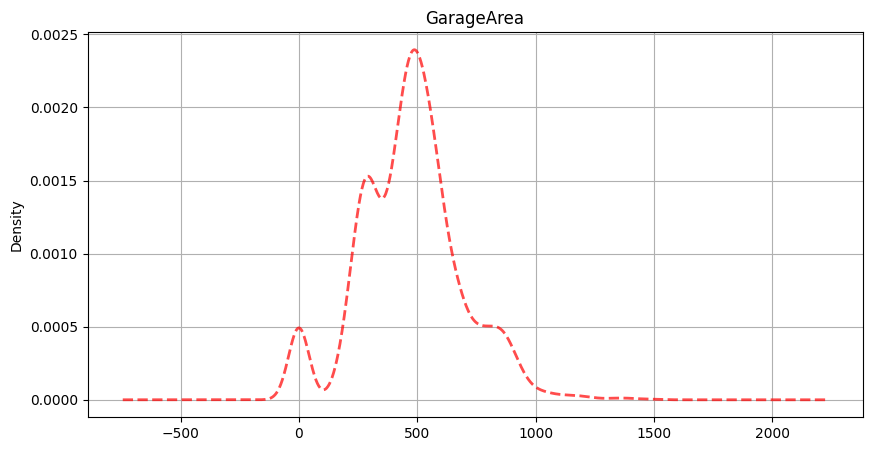

In [16]:
# kde GarageArea
df["GarageArea"].plot(kind="kde",title="GarageArea",color="r",linewidth=2,linestyle="--",alpha=0.7,figsize=(10,5),grid=True);

In [17]:
df.GarageArea.describe()

count    2918.000000
mean      472.874572
std       215.394815
min         0.000000
25%       320.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64

In [18]:
df.GarageArea.fillna(df.GarageArea.mean(),inplace=True)

In [19]:
# fill with mode
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

In [20]:
# Fill missing values in 'BsmtFinType1' based on frequencies
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(pd.Series(np.random.choice(
    df['BsmtFinType1'].dropna().value_counts().index,
    size=df['BsmtFinType1'].isnull().sum(),
    p=df['BsmtFinType1'].dropna().value_counts(normalize=True)),
    index=df[df['BsmtFinType1'].isnull()].index))

# Fill missing values in 'BsmtFinType2' based on frequencies
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(pd.Series(np.random.choice(
    df['BsmtFinType2'].dropna().value_counts().index,
    size=df['BsmtFinType2'].isnull().sum(),
    p=df['BsmtFinType2'].dropna().value_counts(normalize=True)),
    index=df[df['BsmtFinType2'].isnull()].index))


In [21]:
# GarageFinish mapping
garage_finish_mapping = {
    'NA': 0,
    'Unf': 1,
    'RFn': 2,
    'Fin': 3
}

# to numeric
df['GarageFinish'] = df['GarageFinish'].map(garage_finish_mapping)

# Group by neighborhood and get the most frequent value of GarageFinish
garage_finish_mode_by_neighborhood = df.groupby('Neighborhood')['GarageFinish'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

# Fill missing values in GarageFinish based on neighborhood
df['GarageFinish'] = df.apply(
    lambda row: garage_finish_mode_by_neighborhood[row['Neighborhood']] if pd.isnull(row['GarageFinish']) else row['GarageFinish'],
    axis=1
)

In [22]:
# Her mahalle için medyan LotFrontage değerini hesapla
lot_frontage_by_neighborhood = df.groupby('Neighborhood')['LotFrontage'].median()

# Eksik değerleri mahalle medyan değeri ile doldur
df['LotFrontage'] = df.apply(
    lambda row: lot_frontage_by_neighborhood[row['Neighborhood']] if pd.isnull(row['LotFrontage']) else row['LotFrontage'],
    axis=1
)

In [23]:
#missing values ( just missings)
missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]
missing_values

SalePrice      1459
GarageYrBlt     159
dtype: int64

--------
* Combine - BsmtFinSF2 , BsmtFinType2,BsmtFinSF1 , BsmtFinType1
* Get new 2 features. Drop others

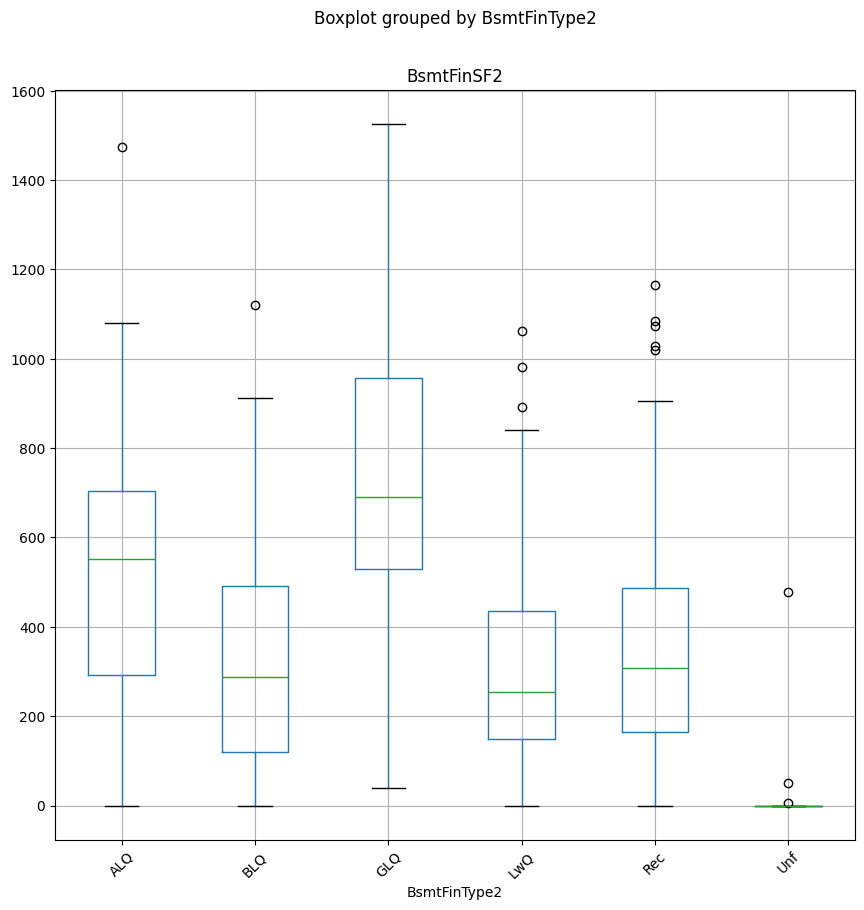

In [24]:
df.boxplot(column="BsmtFinSF2",by="BsmtFinType2",figsize=(10,10),rot=45);

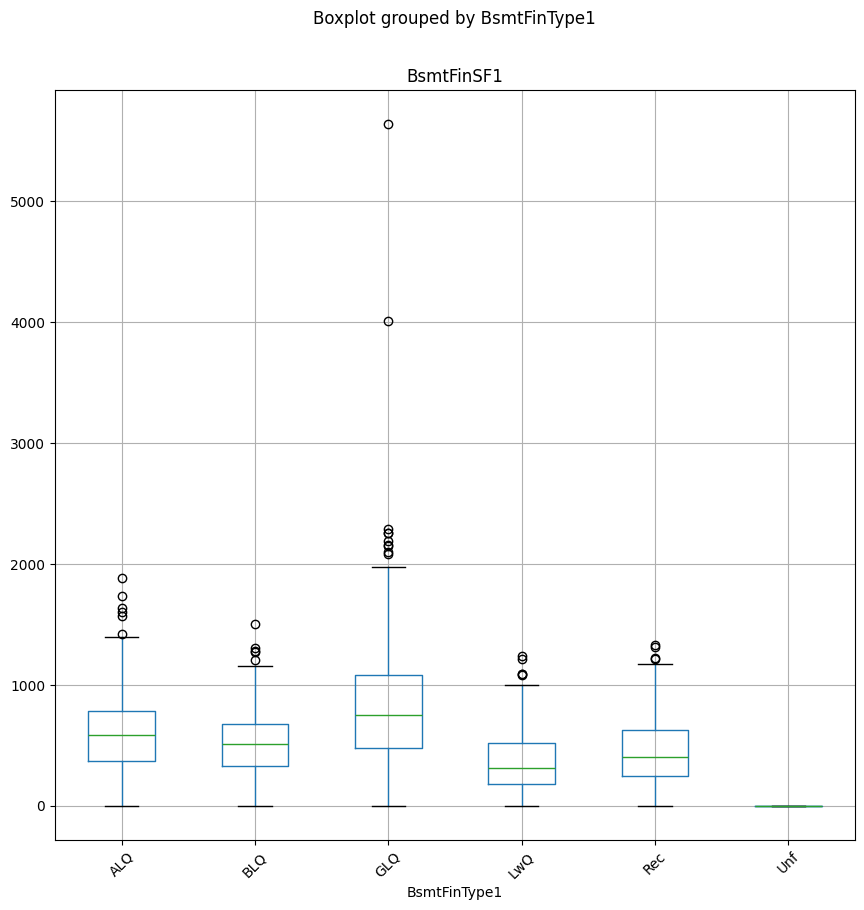

In [25]:
df.boxplot(column="BsmtFinSF1",by="BsmtFinType1",figsize=(10,10),rot=45);

In [26]:
df['TotalBsmtFinSF'] = df['BsmtFinSF1'] + df['BsmtFinSF2']
bsmt_fin_type_mapping = {
    'NA': 0,
    'Unf': 1,
    'LwQ': 2,
    'Rec': 3,
    'BLQ': 4,
    'ALQ': 5,
    'GLQ': 6
}
# Map the basement finish types to integers
df['BsmtFinType1'] = df['BsmtFinType1'].map(bsmt_fin_type_mapping).astype(int)
df['BsmtFinType2'] = df['BsmtFinType2'].map(bsmt_fin_type_mapping).astype(int)

------------
* Exterior1st and Exterior2nd are combined

In [27]:
df.Exterior1st.value_counts()

Exterior1st
VinylSd    1026
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [28]:
df.Exterior2nd.value_counts()

Exterior2nd
VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [29]:
# Exteriors combined
# df['CombinedExterior'] = df['Exterior1st'] + '_' + df['Exterior2nd']
# df.drop(['Exterior1st', 'Exterior2nd'], axis=1, inplace=True)

In [30]:
unique_values = set(df['Exterior1st']).union(set(df['Exterior2nd']))

for value in unique_values:
    df[f'Has_{value}'] = df.apply(lambda row: int(row['Exterior1st'] == value or row['Exterior2nd'] == value), axis=1)


----------
* bsmtqual , bsmtcond , bsmtexposure; they are mapped to numerical values

In [31]:
bsmt_qual_mapping = {
    'NA': 0,
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
}
bsmt_cond_mapping = {
    'NA': 0,
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
}
bsmt_exposure_mapping = {
    'NA': 0,
    'No': 1,
    'Mn': 2,
    'Av': 3,
    'Gd': 4
}
df['BsmtQual'] = df['BsmtQual'].map(bsmt_qual_mapping).astype(int)
df['BsmtCond'] = df['BsmtCond'].map(bsmt_cond_mapping).astype(int)
df['BsmtExposure'] = df['BsmtExposure'].map(bsmt_exposure_mapping).astype(int)


--------
* GarageYearBuilt -> [Now]- GarageYrBlt

In [32]:
from datetime import datetime
current_year = datetime.now().year
garage_yr_blt_mode_by_neighborhood = df.groupby('Neighborhood')['GarageYrBlt'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

df['GarageYrBlt'] = df.apply(
    lambda row: garage_yr_blt_mode_by_neighborhood[row['Neighborhood']] if pd.isnull(row['GarageYrBlt']) else row['GarageYrBlt'],
    axis=1
)

df["GarageAge"] = current_year - df["GarageYrBlt"]

----------
* Age : [Now] - YearBuilt

In [33]:
df["Age"] = current_year - df["YearBuilt"]

In [34]:
df["RemodAge"] = current_year - df["YearRemodAdd"]

-----------

* object to integer or float

In [35]:
#corr(abs) > 0.4 - salesprice
corr = df.corr(numeric_only=True)
corr = corr.abs()
corr = corr["SalePrice"]
corr = corr[corr > 0.3]

corr


LotFrontage       0.347806
OverallQual       0.790982
YearBuilt         0.522897
YearRemodAdd      0.507101
MasVnrArea        0.472614
BsmtQual          0.633717
BsmtExposure      0.347364
BsmtFinSF1        0.386420
TotalBsmtSF       0.613581
1stFlrSF          0.605852
2ndFlrSF          0.319334
GrLivArea         0.708624
FullBath          0.560664
TotRmsAbvGrd      0.533723
Fireplaces        0.466929
GarageYrBlt       0.509094
GarageFinish      0.536059
GarageCars        0.640409
GarageArea        0.623431
WoodDeckSF        0.324413
OpenPorchSF       0.315856
SalePrice         1.000000
TotalBsmtFinSF    0.366328
Has_VinylSd       0.302553
GarageAge         0.509094
Age               0.522897
RemodAge          0.507101
Name: SalePrice, dtype: float64

In [36]:
df.MSSubClass.astype("int64")

0        60
1        20
2        60
3        70
4        60
       ... 
1454    160
1455    160
1456     20
1457     85
1458     60
Name: MSSubClass, Length: 2919, dtype: int64

In [37]:
# MSZoning mapping
ms_zoning_mapping = {
    'A': 1,
    'C (all)': 2,
    'FV': 3,
    'I': 4,
    'RH': 5,
    'RL': 6,
    'RP': 7,
    'RM': 8
}
df['MSZoning'] = df['MSZoning'].map(ms_zoning_mapping).astype(int)

# Street mapping
street_mapping = {
    'Grvl': 1,
    'Pave': 2
}

df['Street'] = df['Street'].map(street_mapping).astype(int)

# LotShape mapping
lot_shape_mapping = {
    'Reg': 1,
    'IR1': 2,
    'IR2': 3,
    'IR3': 4
}
df['LotShape'] = df['LotShape'].map(lot_shape_mapping).astype(int)
# LandContour mapping
land_contour_mapping = {
    'Lvl': 1,
    'Bnk': 2,
    'HLS': 3,
    'Low': 4
}
df['LandContour'] = df['LandContour'].map(land_contour_mapping).astype(int)

# Utilities mapping
utilities_mapping = {
    'AllPub': 4,
    'NoSewr': 3,
    'NoSeWa': 2,
    'ELO': 1
}
df['Utilities'] = df['Utilities'].map(utilities_mapping).astype(int)

# LotConfig mapping
lot_config_mapping = {
    'Inside': 1,
    'Corner': 2,
    'CulDSac': 3,
    'FR2': 4,
    'FR3': 5
}
df['LotConfig'] = df['LotConfig'].map(lot_config_mapping).astype(int)


# LandSlope mapping
land_slope_mapping = {
    'Gtl': 1,
    'Mod': 2,
    'Sev': 3
}
df['LandSlope'] = df['LandSlope'].map(land_slope_mapping).astype(int)

# Neighborhood mapping
neighborhood_mapping = {
    'Blmngtn': 1,
    'Blueste': 2,
    'BrDale': 3,
    'BrkSide': 4,
    'ClearCr': 5,
    'CollgCr': 6,
    'Crawfor': 7,
    'Edwards': 8,
    'Gilbert': 9,
    'IDOTRR': 10,
    'MeadowV': 11,
    'Mitchel': 12,
    'NAmes': 13,
    'NoRidge': 14,
    'NPkVill': 15,
    'NridgHt': 16,
    'NWAmes': 17,
    'OldTown': 18,
    'SWISU': 19,
    'Sawyer': 20,
    'SawyerW': 21,
    'Somerst': 22,
    'StoneBr': 23,
    'Timber': 24,
    'Veenker': 25
}
df['Neighborhood'] = df['Neighborhood'].map(neighborhood_mapping).astype(int)

# Condition1 mapping
condition1_mapping = {
    'Artery': 1,
    'Feedr': 2,
    'Norm': 3,
    'RRNn': 4,
    'RRAn': 5,
    'PosN': 6,
    'PosA': 7,
    'RRNe': 8,
    'RRAe': 9
}

df['Condition1'] = df['Condition1'].map(condition1_mapping).astype(int)

# Condition2 mapping
condition2_mapping = {
    'Artery': 1,
    'Feedr': 2,
    'Norm': 3,
    'RRNn': 4,
    'RRAn': 5,
    'PosN': 6,
    'PosA': 7,
    'RRNe': 8,
    'RRAe': 9
}

df['Condition2'] = df['Condition2'].map(condition2_mapping).astype(int)

# BldgType mapping
bldg_type_mapping = {
    '1Fam': 1,
    '2fmCon': 2,
    'Duplex': 3,
    'TwnhsE': 4,
    'Twnhs': 5
}

df['BldgType'] = df['BldgType'].map(bldg_type_mapping).astype(int)

# HouseStyle mapping
house_style_mapping = {
    '1Story': 1,
    '1.5Fin': 2,
    '1.5Unf': 3,
    '2Story': 4,
    '2.5Fin': 5,
    '2.5Unf': 6,
    'SFoyer': 7,
    'SLvl': 8
}

df['HouseStyle'] = df['HouseStyle'].map(house_style_mapping).astype(int)

# RoofStyle mapping
roof_style_mapping = {
    'Flat': 1,
    'Gable': 2,
    'Gambrel': 3,
    'Hip': 4,
    'Mansard': 5,
    'Shed': 6
}
df['RoofStyle'] = df['RoofStyle'].map(roof_style_mapping).astype(int)

# RoofMatl mapping
roof_matl_mapping = {
    'ClyTile': 1, 'CompShg': 2, 'Membran': 3, 'Metal': 4, 'Roll': 5,
    'Tar&Grv': 6, 'WdShake': 7, 'WdShngl': 8
}
df['RoofMatl'] = df['RoofMatl'].map(roof_matl_mapping).astype(int)

# Exterior1st mapping
exterior1st_mapping = {
    'AsbShng': 1, 'AsphShn': 2, 'BrkComm': 3, 'BrkFace': 4, 'CBlock': 5,
    'CemntBd': 6, 'HdBoard': 7, 'ImStucc': 8, 'MetalSd': 9, 'Other': 10,
    'Plywood': 11, 'PreCast': 12, 'Stone': 13, 'Stucco': 14, 'VinylSd': 15,
    'Wd Sdng': 16, 'WdShing': 17
}
df['Exterior1st'] = df['Exterior1st'].map(exterior1st_mapping).astype(int)

# Exterior2nd mapping
exterior2nd_mapping = {
    'AsbShng': 1, 'AsphShn': 2, 'Brk Cmn': 3, 'BrkFace': 4, 'CBlock': 5,
    'CmentBd': 6, 'HdBoard': 7, 'ImStucc': 8, 'MetalSd': 9, 'Other': 10,
    'Plywood': 11, 'PreCast': 12, 'Stone': 13, 'Stucco': 14, 'VinylSd': 15,
    'Wd Sdng': 16, 'Wd Shng': 17
}
df['Exterior2nd'] = df['Exterior2nd'].map(exterior2nd_mapping).astype(int)

# ExterQual mapping
exter_qual_mapping = {
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1
}
df['ExterQual'] = df['ExterQual'].map(exter_qual_mapping).astype(int)

# ExterCond mapping
exter_cond_mapping = {
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1
}
df['ExterCond'] = df['ExterCond'].map(exter_cond_mapping).astype(int)

# Foundation mapping
foundation_mapping = {
    'BrkTil': 1, 'CBlock': 2, 'PConc': 3, 'Slab': 4, 'Stone': 5, 'Wood': 6
}
df['Foundation'] = df['Foundation'].map(foundation_mapping).astype(int)

# Heating mapping
heating_mapping = {
    'Floor': 1, 'GasA': 2, 'GasW': 3, 'Grav': 4, 'OthW': 5, 'Wall': 6
}
df['Heating'] = df['Heating'].map(heating_mapping).astype(int)

# HeatingQC mapping
heating_qc_mapping = {
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1
}
df['HeatingQC'] = df['HeatingQC'].map(heating_qc_mapping).astype(int)

# CentralAir mapping
central_air_mapping = {
    'Y': 1, 'N': 0
}
df['CentralAir'] = df['CentralAir'].map(central_air_mapping).astype(int)

# Electrical mapping
electrical_mapping = {
    'SBrkr': 1, 'FuseA': 2, 'FuseF': 3, 'FuseP': 4, 'Mix': 5
}
df['Electrical'] = df['Electrical'].map(electrical_mapping).astype(int)

# KitchenQual mapping
kitchen_qual_mapping = {
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1
}
df['KitchenQual'] = df['KitchenQual'].map(kitchen_qual_mapping).astype(int)

# Functional mapping
functional_mapping = {
    'Typ': 1, 'Min1': 2, 'Min2': 3, 'Mod': 4, 'Maj1': 5, 'Maj2': 6,
    'Sev': 7, 'Sal': 8
}
df['Functional'] = df['Functional'].map(functional_mapping).astype(int)

# PavedDrive mapping
paved_drive_mapping = {
    'Y': 2, 'P': 1, 'N': 0
}
df['PavedDrive'] = df['PavedDrive'].map(paved_drive_mapping).astype(int)

# SaleType mapping
sale_type_mapping = {
    'WD': 1, 'CWD': 2, 'VWD': 3, 'New': 4, 'COD': 5, 'Con': 6, 'ConLw': 7,
    'ConLI': 8, 'ConLD': 9, 'Oth': 10
}
df['SaleType'] = df['SaleType'].map(sale_type_mapping).astype(int)

# SaleCondition mapping
sale_condition_mapping = {
    'Normal': 1, 'Abnorml': 2, 'AdjLand': 3, 'Alloca': 4, 'Family': 5,
    'Partial': 6
}
df['SaleCondition'] = df['SaleCondition'].map(sale_condition_mapping).astype(int)

In [38]:
#print object columns

object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [39]:
##### One Hot Encoding
df = pd.get_dummies(df, columns=object_columns, drop_first=True)


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Columns: 113 entries, Id to MiscFeature_TenC
dtypes: bool(15), float64(15), int32(33), int64(50)
memory usage: 1.9 MB


In [41]:
#corr(abs) > 0.4 - salesprice
corr = df.corr(numeric_only=True)
corr = corr.abs()
corr = corr["SalePrice"]
corr = corr[corr > 0.4]

corr


OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
ExterQual       0.682639
BsmtQual        0.633717
TotalBsmtSF     0.613581
HeatingQC       0.427649
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
KitchenQual     0.659600
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.509094
GarageFinish    0.536059
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
GarageAge       0.509094
Age             0.522897
RemodAge        0.507101
Name: SalePrice, dtype: float64

In [42]:
#Id to another dataframe
# df_id = df["Id"]
# df.drop("Id",axis=1,inplace=True)

# train test
df_train = df[df["SalePrice"].notnull()]
df_test = df[df["SalePrice"].isnull()]

df_train.shape, df_test.shape


((1460, 113), (1459, 113))

In [43]:
X = df_train.drop("SalePrice",axis=1)
y = df_train["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use Gradient Boosting and Random forest regressors
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()

gbr.fit(X_train, y_train)
rfr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)
y_pred_rfr = rfr.predict(X_test)

print("Gradient Boosting Regressor R2 Score:", r2_score(y_test, y_pred_gbr))
print("Random Forest Regressor R2 Score:", r2_score(y_test, y_pred_rfr))
# Mean absolute error or mean square error
print("Gradient Boosting Regressor MAE:", mean_absolute_error(y_test, y_pred_gbr))
print("Random Forest Regressor MAE:", mean_absolute_error(y_test, y_pred_rfr))
#MSE
print("Gradient Boosting Regressor MSE:", mean_squared_error(y_test, y_pred_gbr)**.5)
print("Random Forest Regressor MSE:", mean_squared_error(y_test, y_pred_rfr)**.5)



Gradient Boosting Regressor R2 Score: 0.8916812009412037
Random Forest Regressor R2 Score: 0.8914057164270345
Gradient Boosting Regressor MAE: 17478.821376678865
Random Forest Regressor MAE: 17551.131986301367
Gradient Boosting Regressor MSE: 28824.304382789902
Random Forest Regressor MSE: 28860.935176123938


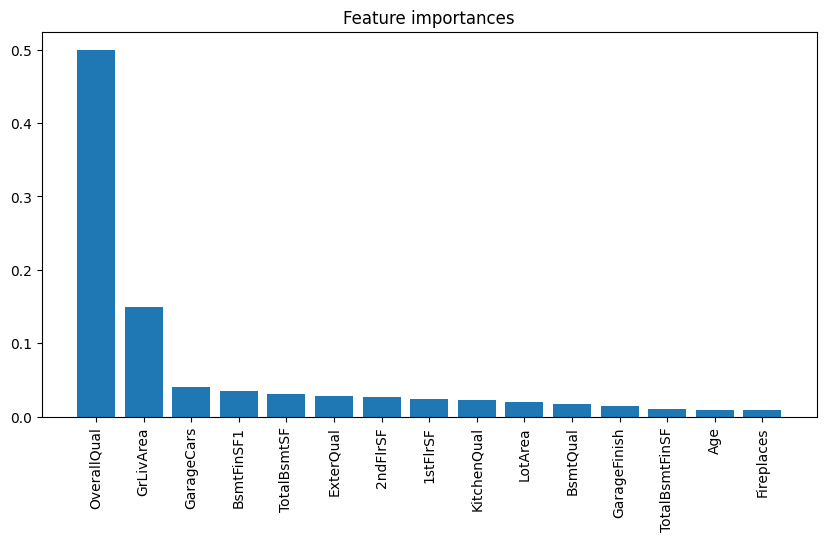

In [44]:
#feature importance(just first 15 features)
importances = gbr.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.bar(range(15), importances[indices[:15]])
plt.xticks(range(15), [features[i] for i in indices[:15]], rotation=90)
plt.show()



In [45]:
# use scaler 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
gbr.fit(X_train_scaled, y_train)
rfr.fit(X_train_scaled, y_train)
y_pred_gbr = gbr.predict(X_test_scaled)
y_pred_rfr = rfr.predict(X_test_scaled)
print("Gradient Boosting Regressor R2 Score:", r2_score(y_test, y_pred_gbr))
print("Random Forest Regressor R2 Score:", r2_score(y_test, y_pred_rfr))


Gradient Boosting Regressor R2 Score: 0.8929088678278925
Random Forest Regressor R2 Score: 0.8903506284023305


In [46]:
algo_test(X,y)

,R_Squared,RMSE,MAE
XGBRegressor,9.100231e-01,2.627075e+04,1.719325e+04
Gradient Boosting,8.907306e-01,2.895051e+04,1.752707e+04
ElasticNet,8.405233e-01,3.497483e+04,2.075051e+04
KNeighborsRegressor,8.368048e-01,3.538023e+04,2.456590e+04
Ridge,8.366156e-01,3.540073e+04,2.230405e+04
Lasso,8.184604e-01,3.731579e+04,2.221387e+04
Linear,8.181724e-01,3.734538e+04,2.222642e+04
Extra Tree,7.815659e-01,4.093240e+04,2.787611e+04
Decision Tree,7.627557e-01,4.265843e+04,2.698568e+04
AdaBoost,6.836233e-01,4.926167e+04,2.903034e+04


In [47]:
# make predictions on test data with XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBRegressor R2 Score:", r2_score(y_test, y_pred_xgb))
print("XGBRegressor MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("XGBRegressor RMSE:", mean_squared_error(y_test, y_pred_xgb)**.5)


XGBRegressor R2 Score: 0.9100230621869714
XGBRegressor MAE: 17193.24538473887
XGBRegressor RMSE: 26270.753018322852


In [48]:
# make predictions on test data with XGBRegressor. and create a submission file

X_train = df_train.drop("SalePrice",axis=1)
y_train = df_train["SalePrice"]
X_test = df_test.drop("SalePrice",axis=1)

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

submission = pd.DataFrame({
    "Id": df_test["Id"],
    "SalePrice": y_pred
})
submission.to_csv("submission.csv", index=False)


In [49]:
# make predictions on test data with GradientBoostingRegressor. and create a submission file

X_train = df_train.drop("SalePrice",axis=1)
y_train = df_train["SalePrice"]
X_test = df_test.drop("SalePrice",axis=1)

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

submission = pd.DataFrame({
    "Id": df_test["Id"],
    "SalePrice": y_pred
})
submission.to_csv("GBR_submission.csv", index=False)

In [50]:
# make predictions on test data with Randomforest. and create a submission file

X_train = df_train.drop("SalePrice",axis=1)
y_train = df_train["SalePrice"]
X_test = df_test.drop("SalePrice",axis=1)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

submission = pd.DataFrame({
    "Id": df_test["Id"],
    "SalePrice": y_pred
})
submission.to_csv("RFR_submission.csv", index=False)


## with Grid Search

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler

def algo_test(x, y):
    # Modeller ve parametreler
    models = {
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet': ElasticNet(),
        'Gradient Boosting': GradientBoostingRegressor(),
        'KNeighborsRegressor': KNeighborsRegressor(),
        'Decision Tree': DecisionTreeRegressor(),
        'XGBRegressor': XGBRegressor(),
        'SVR': SVR(),
        'MLP Regressor': MLPRegressor(),
    }

    params = {
        'Ridge': {'alpha': [0.1, 1, 10]},
        'Lasso': {'alpha': [0.1, 1, 10]},
        'ElasticNet': {'alpha': [0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]},
        'Gradient Boosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]},
        'KNeighborsRegressor': {'n_neighbors': [3, 5, 7]},
        'Decision Tree': {'max_depth': [None, 10, 20]},
        'XGBRegressor': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]},
        'SVR': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
        'MLP Regressor': {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': [0.0001, 0.001, 0.01]}
    }

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

    best_results = []

    for name, model in models.items():
        grid = GridSearchCV(model, params[name], scoring='r2', cv=5)
        grid.fit(x_train, y_train)
        best_model = grid.best_estimator_
        predictions = best_model.predict(x_test)

        best_results.append({
            'Model': name,
            'Best Params': grid.best_params_,
            'R_Squared': r2_score(y_test, predictions),
            'RMSE': mean_squared_error(y_test, predictions) ** 0.5,
            'MAE': mean_absolute_error(y_test, predictions)
        })

    result_df = pd.DataFrame(best_results).sort_values('R_Squared', ascending=False).reset_index(drop=True)

    return result_df


In [54]:
algo_test(X, y)


In [55]:
# we will use XGBRegressor  {'learning_rate': 0.1, 'n_estimators': 200} for our model
# make predictions on test data with XGBRegressor. and create a submission file

X_train = df_train.drop("SalePrice",axis=1)
y_train = df_train["SalePrice"]
X_test = df_test.drop("SalePrice",axis=1)

xgb = XGBRegressor(learning_rate=0.1, n_estimators=200)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

submission = pd.DataFrame({
    "Id": df_test["Id"],
    "SalePrice": y_pred
})
submission.to_csv("XGB_submission.csv", index=False)


## with Randomized Search

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler

def algo_test(x, y):
    # Modeller ve parametreler
    models = {
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet': ElasticNet(),
        'Gradient Boosting': GradientBoostingRegressor(),
        'KNeighborsRegressor': KNeighborsRegressor(),
        'Decision Tree': DecisionTreeRegressor(),
        'XGBRegressor': XGBRegressor(),
        'SVR': SVR(),
        'MLP Regressor': MLPRegressor(),
    }

    params = {
        'Ridge': {'alpha': [0.1, 1, 10]},
        'Lasso': {'alpha': [0.1, 1, 10]},
        'ElasticNet': {'alpha': [0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]},
        'Gradient Boosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]},
        'KNeighborsRegressor': {'n_neighbors': [3, 5, 7]},
        'Decision Tree': {'max_depth': [None, 10, 20]},
        'XGBRegressor': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]},
        'SVR': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
        'MLP Regressor': {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': [0.0001, 0.001, 0.01]}
    }

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

    best_results = []

    for name, model in models.items():
        random_search = RandomizedSearchCV(model, params[name], scoring='r2', cv=5, n_iter=10, random_state=42)
        random_search.fit(x_train, y_train)
        best_model = random_search.best_estimator_
        predictions = best_model.predict(x_test)

        best_results.append({
            'Model': name,
            'Best Params': random_search.best_params_,
            'R_Squared': r2_score(y_test, predictions),
            'RMSE': mean_squared_error(y_test, predictions) ** 0.5,
            'MAE': mean_absolute_error(y_test, predictions)
        })

    result_df = pd.DataFrame(best_results).sort_values('R_Squared', ascending=False).reset_index(drop=True)

    return result_df

algo_test(X, y)